<a href="https://colab.research.google.com/github/deepalsr/ml-Lab/blob/main/ml_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random


In [ ]:


# Create blob data
X_blob, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
X_blob = StandardScaler().fit_transform(X_blob)


In [ ]:
def plot_elbow(X, max_k=10, title="Elbow Method"):
    distortions = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)  # Inertia: sum of squared distances

    plt.figure()
    plt.plot(range(1, max_k+1), distortions, marker='o')
    plt.title(title)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.grid(True)
    plt.show()


Random k for make_blobs: 2


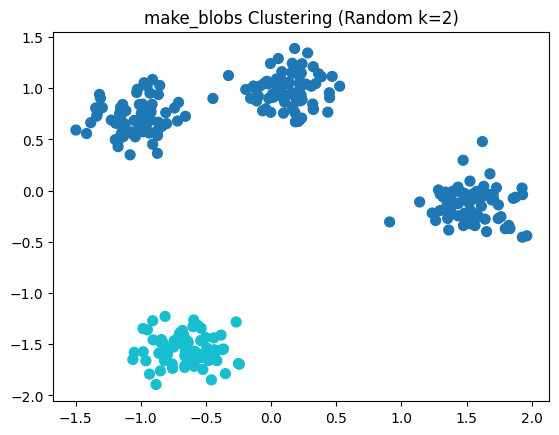

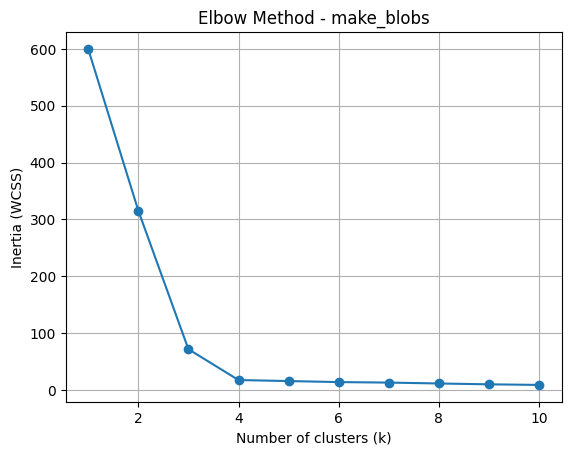

In [ ]:
# Random k for blobs
random_k_blob = random.randint(2, 8)
print("Random k for make_blobs:", random_k_blob)

# Run KMeans with random k
kmeans_blob = KMeans(n_clusters=random_k_blob, random_state=42)
labels_blob = kmeans_blob.fit_predict(X_blob)

# Plot clustered blobs
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labels_blob, cmap='tab10', s=50)
plt.title(f"make_blobs Clustering (Random k={random_k_blob})")
plt.show()

# Elbow Method for blobs
plot_elbow(X_blob, title="Elbow Method - make_blobs")


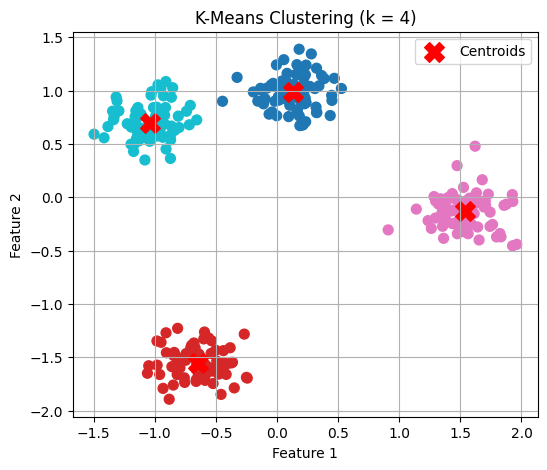

In [ ]:
# Step 1: Apply KMeans with optimal k
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans_final.fit_predict(X_blob)

# Step 2: Visualize clustered data
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labels, cmap='tab10', s=50)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title(f"K-Means Clustering (k = {optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
score = silhouette_score(X_blob, labels)

print(f"Silhouette Score for k = {optimal_k}: {score:.4f}")


Silhouette Score for k = 4: 0.7975


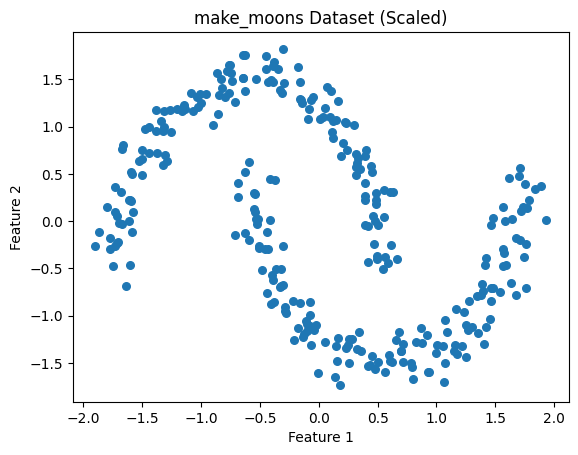

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Create moon-shaped dataset
X_moon, _ = make_moons(n_samples=300, noise=0.07, random_state=42)

# Step 2: Scale the features
scaler = StandardScaler()
X_moon = scaler.fit_transform(X_moon)

# Step 3: Visualize the dataset
plt.scatter(X_moon[:, 0], X_moon[:, 1], s=30)
plt.title("make_moons Dataset (Scaled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


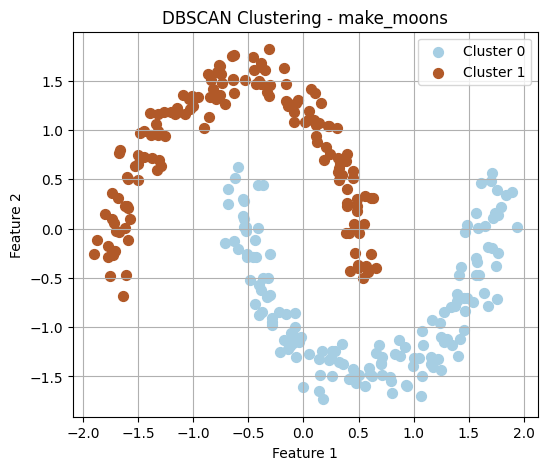

In [ ]:
from sklearn.cluster import DBSCAN

# Step 1: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels_db = dbscan.fit_predict(X_moon)

# Step 2: Visualize DBSCAN Clustering
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 5))
# -1 label means noise
unique_labels = np.unique(labels_db)
colors = plt.cm.Paired(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    mask = (labels_db == label)
    label_name = f"Cluster {label}" if label != -1 else "Noise"
    plt.scatter(X_moon[mask, 0], X_moon[mask, 1], s=50, color=color, label=label_name)

plt.title("DBSCAN Clustering - make_moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Exclude noise points for silhouette calculation
# DBSCAN labels noise as -1, silhouette_score requires >=2 clusters
mask = labels_db != -1
if len(set(labels_db[mask])) > 1:
    sil_score_dbscan = silhouette_score(X_moon[mask], labels_db[mask])
    print(f"Silhouette Score (excluding noise): {sil_score_dbscan:.4f}")
else:
    print("Silhouette score cannot be calculated — less than 2 clusters after removing noise.")


Silhouette Score (excluding noise): 0.3824


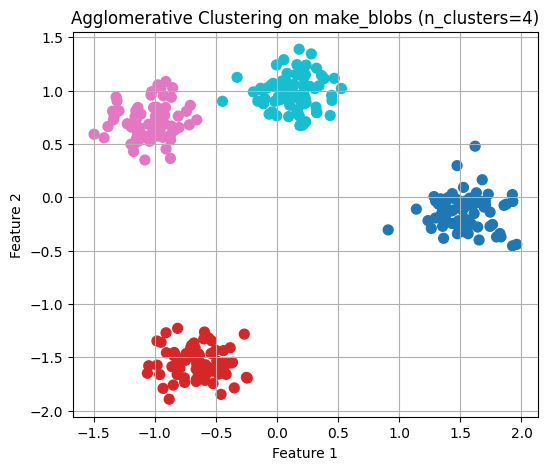

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Set number of clusters
n_clusters = 4

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
labels_agg = agg_clust.fit_predict(X_blob)

# Plot the clusters
plt.figure(figsize=(6, 5))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labels_agg, cmap='tab10', s=50)
plt.title(f'Agglomerative Clustering on make_blobs (n_clusters={n_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()



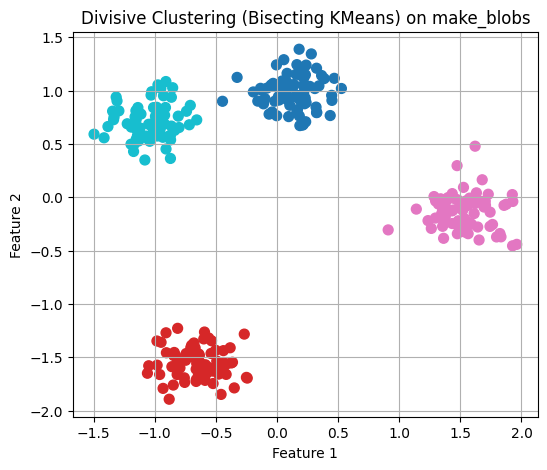

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

def bisecting_kmeans(X, desired_clusters=4):
    n_samples = X.shape[0]
    labels = np.zeros(n_samples, dtype=int)         # All start in cluster 0
    clusters = {0: np.arange(n_samples)}             # cluster_id -> indices
    next_cluster_id = 1

    while len(clusters) < desired_clusters:
        # Find largest cluster to split
        largest_cluster_id = max(clusters, key=lambda cid: len(clusters[cid]))
        indices_to_split = clusters.pop(largest_cluster_id)
        X_split = X[indices_to_split]

        # Split into 2 clusters
        kmeans = KMeans(n_clusters=2, random_state=42)
        split_labels = kmeans.fit_predict(X_split)

        # Assign indices for two new clusters
        cluster1_indices = indices_to_split[split_labels == 0]
        cluster2_indices = indices_to_split[split_labels == 1]

        # Old cluster ID keeps cluster1 points
        clusters[largest_cluster_id] = cluster1_indices
        # New cluster ID assigned to cluster2 points
        clusters[next_cluster_id] = cluster2_indices

        # Update labels array
        labels[cluster1_indices] = largest_cluster_id
        labels[cluster2_indices] = next_cluster_id

        next_cluster_id += 1

    return labels

# Run bisecting KMeans on blobs dataset
labels_bisect_blob = bisecting_kmeans(X_blob, desired_clusters=4)

# Plot results
plt.figure(figsize=(6, 5))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labels_bisect_blob, cmap='tab10', s=50)
plt.title('Divisive Clustering (Bisecting KMeans) on make_blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()




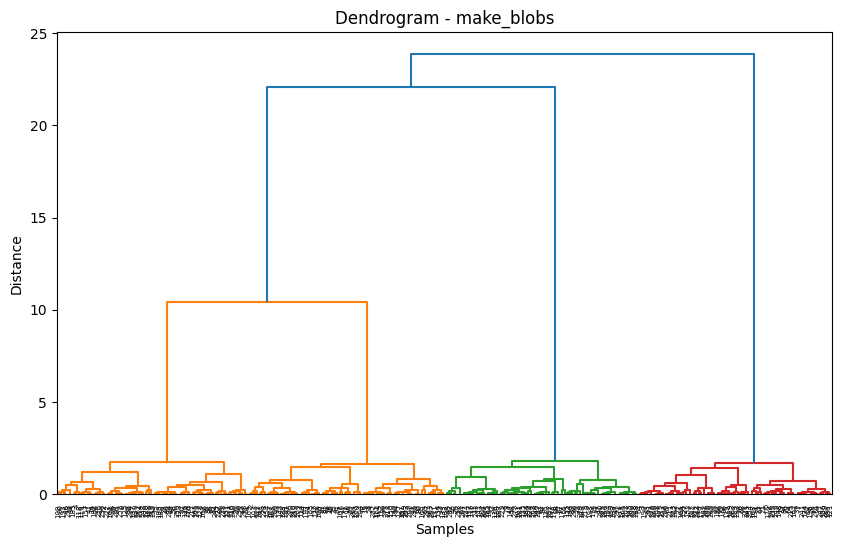

In [ ]:
linked_blobs = linkage(X_blob, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked_blobs,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram - make_blobs')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
